<a href="https://colab.research.google.com/github/hws2002/Deep_Learning_with_Keras/blob/main/Chapter3/Chapter3_5_tensorflow_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 상수 텐서와 변수

## 모두 1 또는 0인 텐서

In [3]:
import tensorflow as tf
x = tf.ones(shape = (2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [4]:
x = tf.zeros(shape = (2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

np.ones(shape = (2,1))  
np.zeros(shape = (2,1))
과 동일  


## 랜덤 텐서

In [5]:
x = tf.random.normal(shape = (3,1), mean = 0, stddev = 1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 1.5709127 ],
       [-0.36011925],
       [-1.6574422 ]], dtype=float32)>

np.random.normal(size = (3,1), loc = 0, scale = 1.) 과 같음

In [7]:
x = tf.random.uniform(shape = (3,1), minval = 0, maxval = 1.)

np.random.uniform(size = (3,1), low = 0., high = 1.) 과 같음

### ! 텐서플로 텐선에는 값을 할당할 수 없음!

In [13]:
# 예를 들어 넘파이 배열에서는 다음과 같은 게 가능하다
import numpy as np
x = np.ones(shape = (2,2))

print(x)

x[0,0] = 0.
print("-"*10)
print(x)

[[1. 1.]
 [1. 1.]]
----------
[[0. 1.]
 [1. 1.]]


In [14]:
# 하지만 텐서플로 텐서에는 값을 할당하지 못함
x = tf.ones(shape = (2,2))
x[0,0] = 0

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

## `tf.Varialbe`

In [42]:
v = tf.Variable(initial_value = tf.random.normal(shape = (3,1)))
print(v)
print(type(v))

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.7579968],
       [-1.2251258],
       [ 2.0748165]], dtype=float32)>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


변수의 상태는 assign 메서드로 수정할 수 있음.

In [43]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

변수의 일부 원소에만 적용하는 것도 가능

In [44]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [45]:
v[0,0] = 2.

TypeError: 'ResourceVariable' object does not support item assignment

In [32]:
v = tf.zeros((3,1))
v

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.]], dtype=float32)>

In [33]:
print(type(v))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [46]:
# 비슷하게 assign_add() 와 assign_sub()이 각각 +=, -=와 동일함.
v.assign_add(tf.ones((3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

# 텐서 연산 : 텐서플로에서 수학 계산하기

In [48]:
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b+c
e = tf.matmul(a,b)
e *= d
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

# GradientTape API

In [52]:
input_var = tf.Variable(initial_value = 3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)

gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [54]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time**2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

# end-to-end 예제 : 텐서플로 선형 분류기

선형적으로 잘 구분되는 합성 데이터 만들기

In [56]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1, 0.5],[0.5, 1]],
    size = num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1, 0.5],[0.5, 1]],
    size = num_samples_per_class)


In [57]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [58]:
targets = np.vstack((
                      np.zeros( (num_samples_per_class, 1) , dtype = 'float32'),
                      np.ones( (num_samples_per_class,1),dtype = "float32")
                    )
)


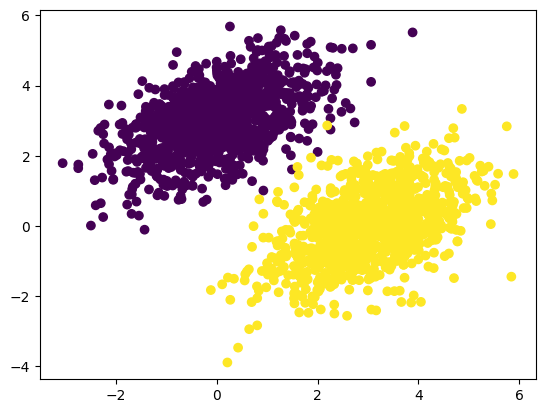

In [59]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0], inputs[:,1], c = targets[:,0])
plt.show()

두 포인트 클라우드를 구분할 수 있는 선형 분류기 만들기.
prediction = W * input + b

In [61]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

### 정방향 패스

In [63]:
def model(inputs):
  return tf.matmul(inputs, W) + b

### 손실 함수

In [64]:
def square_loss(targets, predictions):
  per_sample_loss = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_loss)

### 훈련 스텝 함수

In [65]:
learning_rate= 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_wrt_W, grad_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(learning_rate * grad_wrt_W)
  b.assign_sub(learning_rate * grad_wrt_b)
  return loss


### 배치 훈련
구현을 간단하게 하기 위해 미니 배치 훈련 대신 배치 훈련을 사용해보자.  
즉, 데이터를 작은 배치로 나누어 반복하지 않고 전체 데이터를 사용하여 훈련 스텝을 실행해본다.

In [66]:
for step in range(40'''epochs'''):
  loss = training_step(inputs, targets)
  print(f"{step}번째 스텝의 손실 : {loss:.4f}")

0번째 스텝의 손실 : 0.5954
1번째 스텝의 손실 : 0.1627
2번째 스텝의 손실 : 0.1068
3번째 스텝의 손실 : 0.0942
4번째 스텝의 손실 : 0.0874
5번째 스텝의 손실 : 0.0818
6번째 스텝의 손실 : 0.0767
7번째 스텝의 손실 : 0.0722
8번째 스텝의 손실 : 0.0680
9번째 스텝의 손실 : 0.0642
10번째 스텝의 손실 : 0.0607
11번째 스텝의 손실 : 0.0575
12번째 스텝의 손실 : 0.0546
13번째 스텝의 손실 : 0.0520
14번째 스텝의 손실 : 0.0496
15번째 스텝의 손실 : 0.0474
16번째 스텝의 손실 : 0.0454
17번째 스텝의 손실 : 0.0436
18번째 스텝의 손실 : 0.0419
19번째 스텝의 손실 : 0.0404
20번째 스텝의 손실 : 0.0390
21번째 스텝의 손실 : 0.0378
22번째 스텝의 손실 : 0.0366
23번째 스텝의 손실 : 0.0356
24번째 스텝의 손실 : 0.0346
25번째 스텝의 손실 : 0.0337
26번째 스텝의 손실 : 0.0329
27번째 스텝의 손실 : 0.0322
28번째 스텝의 손실 : 0.0316
29번째 스텝의 손실 : 0.0310
30번째 스텝의 손실 : 0.0304
31번째 스텝의 손실 : 0.0299
32번째 스텝의 손실 : 0.0295
33번째 스텝의 손실 : 0.0290
34번째 스텝의 손실 : 0.0287
35번째 스텝의 손실 : 0.0283
36번째 스텝의 손실 : 0.0280
37번째 스텝의 손실 : 0.0277
38번째 스텝의 손실 : 0.0274
39번째 스텝의 손실 : 0.0272


In [68]:
predictions = model(inputs)
predictions = np.where( predictions > 0.5, 1, 0)

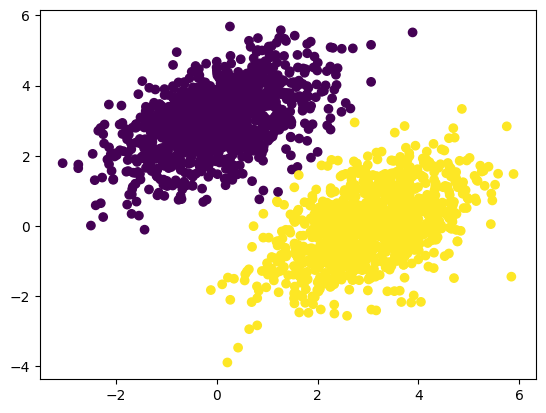

In [71]:
plt.scatter(inputs[:,0], inputs[:,1], c = predictions)
plt.show()

# 초평면 그리기

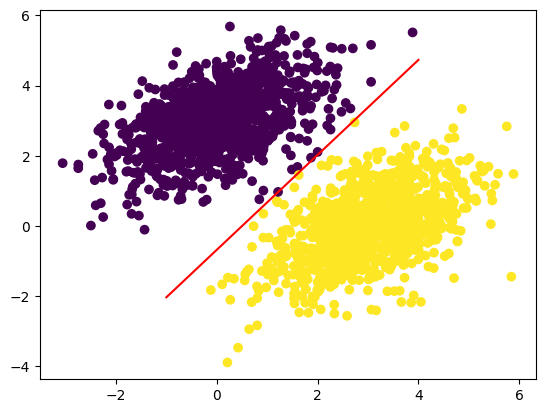

In [80]:
x = np.linspace(-1,4,100).astype("float32")
y = (0.5 - b - W[0]*x) / W[1]

plt.scatter(inputs[:,0], inputs[:,1], c = predictions)
plt.plot(x, y ,'-r')
plt.show()

## Follow-up : gradient 구하기  
위의 예제에서는  


```
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_wrt_W, grad_wrt_b = tape.gradient(loss, [W,b])
```
로 gradient를 쉽게 구했다.  
이를 직접 구현해보자(CS229 PS1에서 한적 있음)  

